In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

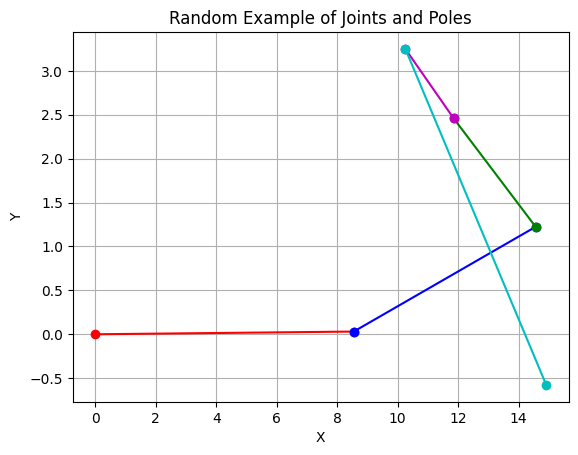

In [8]:

def visualize_random_example(df):
    # Select a random example from the DataFrame
    random_example = df.sample(1).iloc[0]
    
    # Extract joint positions
    x = np.array([random_example[f'x{i+1}_{j+1}'] for i in range(4) for j in range(2)]).reshape(4, 2)
    
    # Extract lengths and angles
    d = random_example[['d1', 'd2', 'd3', 'd4', 'd5']]
    phi = random_example[['phi1', 'phi2', 'phi3', 'phi4']]
    
    # Plot the joints and poles
    fig, ax = plt.subplots()
    ax.plot([0, x[0, 0]], [0, x[0, 1]], 'ro-')  # Pole 1
    ax.plot([x[0, 0], x[1, 0]], [x[0, 1], x[1, 1]], 'bo-')  # Pole 2
    ax.plot([x[1, 0], x[2, 0]], [x[1, 1], x[2, 1]], 'go-')  # Pole 3
    ax.plot([x[2, 0], x[3, 0]], [x[2, 1], x[3, 1]], 'mo-')  # Pole 4
    ax.plot([x[3, 0], x[3, 0] + d[4] * np.cos(np.sum(phi))], [x[3, 1], x[3, 1] + d[4] * np.sin(np.sum(phi))], 'co-')  # Pole 5
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Random Example of Joints and Poles')
    plt.grid(True)
    
    
    plt.show()

#load data
df = pd.read_csv('toy_dataset.csv')



# Visualize a random example
visualize_random_example(df)

In [ ]:
python scripts/train.py --data_path "data/toy_dataset.csv" --batch_size 32 --learning_rate 0.01 --gamma 0.999 --step_size 30 --num_epochs 140 --model_path "models/autoencoder_delta0.1.pth" --experiment_name " delta =0.1"


In [9]:
import sys
print(sys.executable)

C:\Users\User\anaconda3\python.exe


In [10]:
python scripts/train.py --data_path "data/toy_dataset.csv" --batch_size 8192  --learning_rate 0.1 --gamma 0.7 --step_size 100 --num_epochs 1000  --delta 0 --model_path "models/autoencoder_delta0.3.pth" --experiment_name "gamma=0.999 network much bigger" --init_method "xavier"


SyntaxError: invalid syntax (3275845540.py, line 1)

In [20]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(8, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.BatchNorm1d(4)
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 8)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Load the trained model
model = Autoencoder()
model.load_state_dict(torch.load('models/autoencoder.pth'))
model.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=8, bias=True)
    (7): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=8, out_features=4, bias=True)
    (10): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=16, bias=True)
    (4): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_runn

In [41]:
def generate_data(num_samples=1000):
    data = []

    d = [1,3,5,2,3]  # Lengths d1, d2, d3, d4, d5
   
    phi = np.random.uniform(0, np.pi, size=4)  # Angles phi1, phi2, phi3, phi4
    x = np.zeros((4, 2))  # Assume 2D for simplicity
    x[0] = [d[0] * np.cos(phi[0]), d[0] * np.sin(phi[0])]
    x[1] = x[0] + [d[1] * np.cos(phi[1]), d[1] * np.sin(phi[1])]
    x[2] = x[1] + [d[2] * np.cos(phi[2]), d[2] * np.sin(phi[2])]
    x[3] = x[2] + [d[3] * np.cos(phi[3]), d[3] * np.sin(phi[3])]

    return x

# Generate a single input sample
data = generate_data(num_samples=1)
input_point = data.reshape(-1)

In [42]:
input_point

array([-0.04718577,  0.99888613, -2.19335277,  3.09506532, -7.06511396,
        4.22020658, -9.01073651,  4.68340514])

In [43]:
input_point

array([-0.04718577,  0.99888613, -2.19335277,  3.09506532, -7.06511396,
        4.22020658, -9.01073651,  4.68340514])

In [44]:
encoded = model.encoder(input_tensor).detach().numpy()


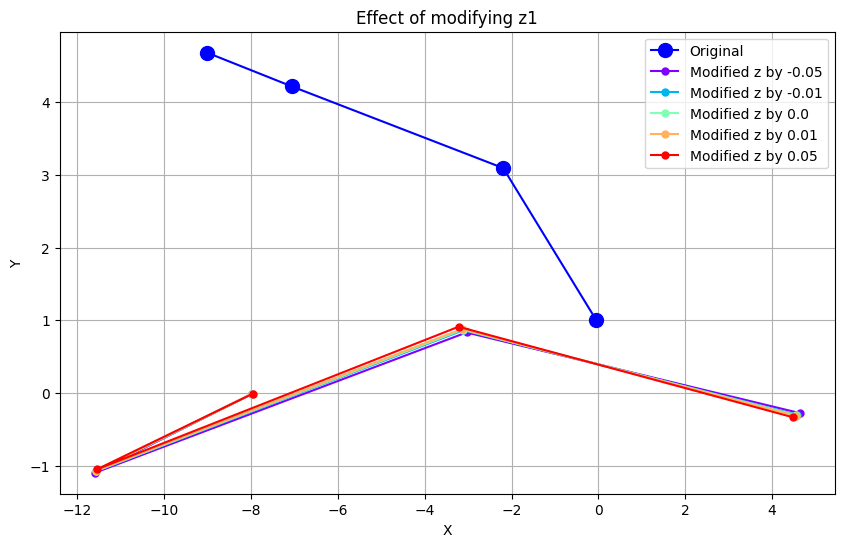

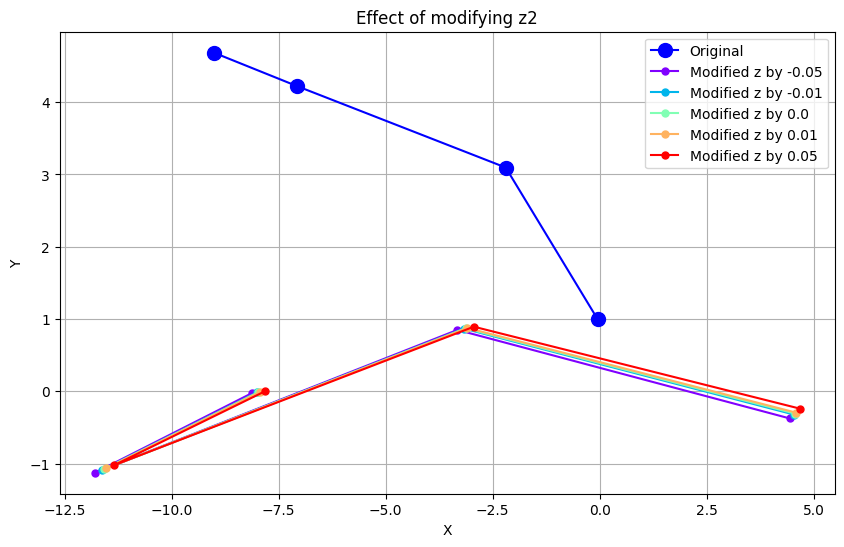

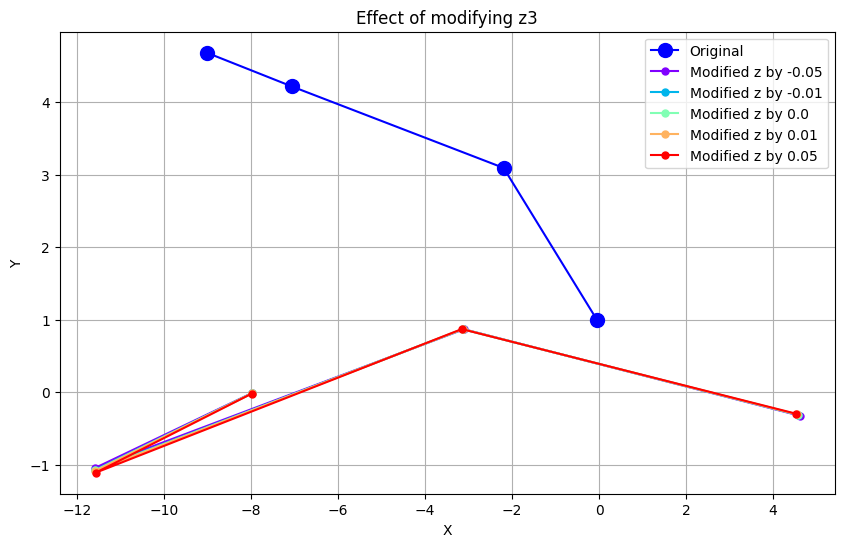

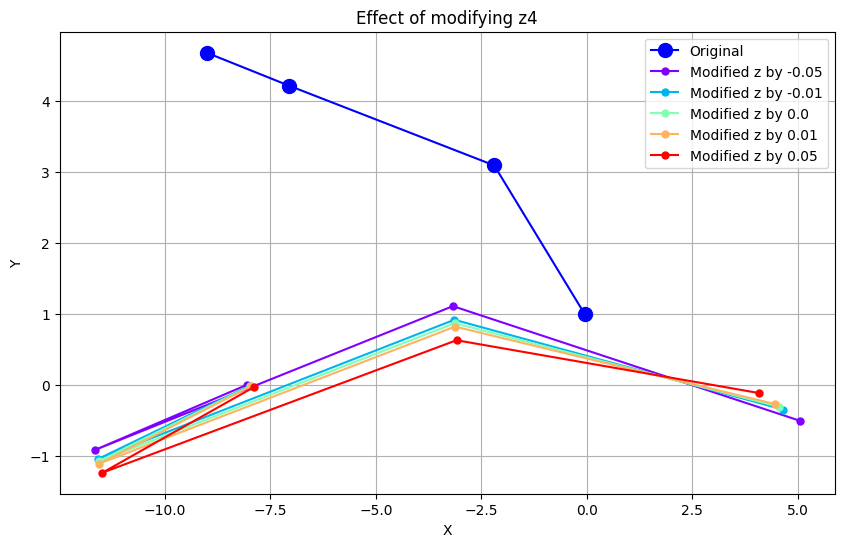

In [45]:
# Plot function
def plot_points(original, modified_points, values_to_add, title):
    plt.figure(figsize=(10, 6))
    plt.plot(original[::2], original[1::2], 'bo-', label='Original', markersize=10)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(modified_points)))
    for i, points in enumerate(modified_points):
        plt.plot(points[::2], points[1::2], 'o-', color=colors[i], label=f'Modified z by {values_to_add[i]}', markersize=5)
    plt.legend()
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Manipulate each latent variable and decode
values_to_add = [-0.05, -0.01, 0.0, 0.01, 0.05]
for i in range(encoded.shape[1]):
    modified_points = []
    for val in values_to_add:
        modified_encoded = encoded.copy()
        modified_encoded[0, i] += val  # Change the latent variable
        modified_tensor = torch.tensor(modified_encoded, dtype=torch.float32)
        decoded = model.decoder(modified_tensor).detach().numpy()
        modified_points.append(decoded.flatten())
    plot_points(input_point, modified_points, values_to_add, f"Effect of modifying z{i+1}")